In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

from wordcloud import WordCloud, STOPWORDS

## EDA for final dataset

1. User has between 500-1000 reviews
2. Recipe dataset and user interaction dataset are combined (based on id)


In [2]:
df = pd.read_csv('/content/drive/MyDrive/IntroML/data/final_dataset.csv')
df.head(3)

,recipe_id,category,name,n_ingredients,minutes,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV),user_id,date,review,rating
0,5315,beverages,icy holiday punch,6,1440,54.5,0.0,50.0,0.0,0.0,0.0,4.0,8629,2001-04-24,I brought this to an office holiday party and ...,4
1,8661,salads,oliveau salad dressing,8,20,168.7,28.0,3.0,3.0,0.0,12.0,0.0,13483,2001-08-05,Good recipe and easy to make. I found it a li...,4
2,10859,vegetables,broccoli cauliflower and rice casserole,5,85,228.8,24.0,12.0,46.0,18.0,32.0,4.0,8629,2001-08-15,This is a nice casserole. It is very easy to ...,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90333 entries, 0 to 90332
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   recipe_id            90333 non-null  int64  
 1   category             90333 non-null  object 
 2   name                 90333 non-null  object 
 3   n_ingredients        90333 non-null  int64  
 4   minutes              90333 non-null  int64  
 5   calories             90333 non-null  float64
 6   total fat (PDV)      90333 non-null  float64
 7   sugar (PDV)          90333 non-null  float64
 8   sodium (PDV)         90333 non-null  float64
 9   protein (PDV)        90333 non-null  float64
 10  saturated fat (PDV)  90333 non-null  float64
 11  carbohydrates (PDV)  90333 non-null  float64
 12  user_id              90333 non-null  int64  
 13  date                 90333 non-null  object 
 14  review               90333 non-null  object 
 15  rating               90333 non-null 

## EDA to do

1. Distribution of nutritional components
2. Distribution of rating score
3. Number of ratings each recipe has vs avg rating of recipe
4. Number of reviews user has done vs avg rating by user
5. Distribution of categories
6. Wordcloud
7. step, minute distribution

### 1. Distribution of nutritional components

In [ ]:
df.columns

Index(['recipe_id', 'category', 'name', 'n_ingredients', 'minutes', 'calories',
       'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)',
       'saturated fat (PDV)', 'carbohydrates (PDV)', 'user_id', 'date',
       'review', 'rating'],
      dtype='object')

In [ ]:
df[['calories',
       'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)',
       'saturated fat (PDV)', 'carbohydrates (PDV)']].describe()

,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
count,90333.000000,90333.000000,90333.000000,90333.000000,90333.000000,90333.000000,90333.000000
mean,425.603888,31.496994,68.539393,25.699733,33.680615,39.092724,13.760143
std,635.987831,59.022159,192.812386,63.971624,56.586973,76.533355,26.992176
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,165.700000,8.000000,9.000000,5.000000,6.000000,6.000000,3.000000
50%,290.400000,18.000000,23.000000,14.000000,17.000000,20.000000,8.000000
75%,476.500000,37.000000,61.000000,31.000000,51.000000,46.000000,15.000000
max,40159.200000,4331.000000,5487.000000,6555.000000,6552.000000,4969.000000,2275.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff57791fd10>,
      dtype=object)

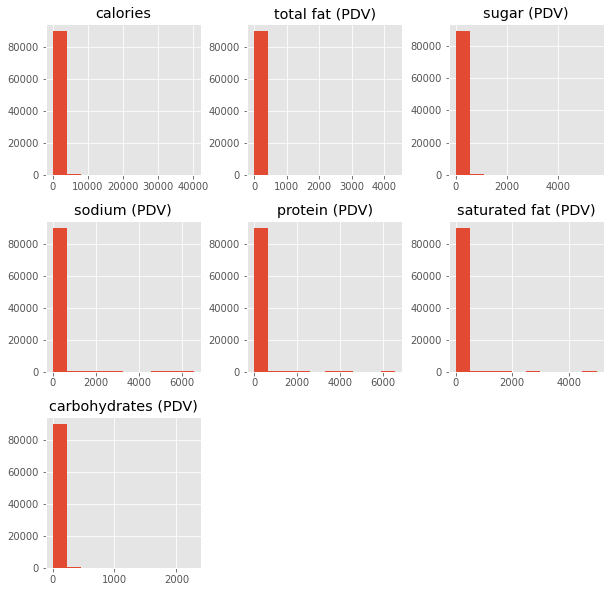

In [ ]:
df[['calories','total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)','saturated fat (PDV)', 'carbohydrates (PDV)']].hist(figsize=(10,10))

### (not used) Removing outliers 
Since there are some outliers, we will proceed to drop them

**Calories** threshold: If we assume the nutritional information is per serving, a reasonable recipe should max ~1000 calories. Thus, we will drop recipes that have more than 1000 calories.

**Other** values: Since they are measured using PDV (percent daily value), we will not take recipes that are more than 200% of the recommended daily intake

In [ ]:
# removing the outliers

df.drop(df[
           (df['calories'] > 1000) | 
           (df['sugar (PDV)'] > 200) | 
           (df['protein (PDV)'] > 200) | 
           (df['total fat (PDV)'] > 200) | 
           (df['sodium (PDV)'] > 200) | 
           (df['saturated fat (PDV)'] > 200) | 
           (df['carbohydrates (PDV)'] > 200) |
           (df['calories'] < 1) |
           (df['sugar (PDV)'] < 1) | 
           (df['protein (PDV)'] < 1) | 
           (df['total fat (PDV)'] < 1) | 
           (df['sodium (PDV)'] < 1) | 
           (df['saturated fat (PDV)'] < 1) | 
           (df['carbohydrates (PDV)'] < 1)           
           ].index, 
        inplace=True)

In [ ]:
df[['calories',
       'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)',
       'saturated fat (PDV)', 'carbohydrates (PDV)']].describe()

,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
count,69220.000000,69220.000000,69220.000000,69220.000000,69220.000000,69220.000000,69220.000000
mean,345.223659,26.246403,38.108567,23.531812,32.171540,32.860156,9.992777
std,198.243930,21.491925,41.319633,23.557576,30.395643,31.157402,7.609291
min,24.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,194.575000,10.000000,10.000000,7.000000,8.000000,10.000000,4.000000
50%,305.100000,20.000000,22.000000,16.000000,21.000000,24.000000,8.000000
75%,456.600000,36.000000,50.000000,32.000000,51.000000,46.000000,14.000000
max,999.900000,168.000000,200.000000,199.000000,200.000000,200.000000,72.000000


### Normalising nutritional data

Since there are 0 values, we will add 1 to all values so they can be log transformed

In [ ]:
df[['calories',
       'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)',
       'saturated fat (PDV)', 'carbohydrates (PDV)']] += 1

In [ ]:
df[['calories',
       'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)',
       'saturated fat (PDV)', 'carbohydrates (PDV)']].describe()

,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
count,90333.000000,90333.000000,90333.000000,90333.000000,90333.000000,90333.000000,90333.000000
mean,426.603888,32.496994,69.539393,26.699733,34.680615,40.092724,14.760143
std,635.987831,59.022159,192.812386,63.971624,56.586973,76.533355,26.992176
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,166.700000,9.000000,10.000000,6.000000,7.000000,7.000000,4.000000
50%,291.400000,19.000000,24.000000,15.000000,18.000000,21.000000,9.000000
75%,477.500000,38.000000,62.000000,32.000000,52.000000,47.000000,16.000000
max,40160.200000,4332.000000,5488.000000,6556.000000,6553.000000,4970.000000,2276.000000


In [ ]:
lst = ['calories',
    'log calories',
    'sqrt calories',
    'total fat (PDV)', 
    'log fat',
    'sqrt fat',
    'sugar (PDV)',
    'log sugar',
    'sqrt sugar', 
    'sodium (PDV)', 
    'log sodium',
    'sqrt sodium',
    'protein (PDV)',
    'log protein',
    'sqrt protein',
    'saturated fat (PDV)',
    'log sat fat',
    'sqrt sat fat', 
    'carbohydrates (PDV)',
    'log carbs',
    'sqrt carbs'
    ]

for i in range(0, len(lst), 3):
  # print(lst[i], lst[i+1], lst[i+2], '\n')
  orig = lst[i]
  log = lst[i+1]
  sqrt = lst[i+2]
  df[log] = np.log(df[orig])
  df[sqrt] = np.sqrt(df[orig])

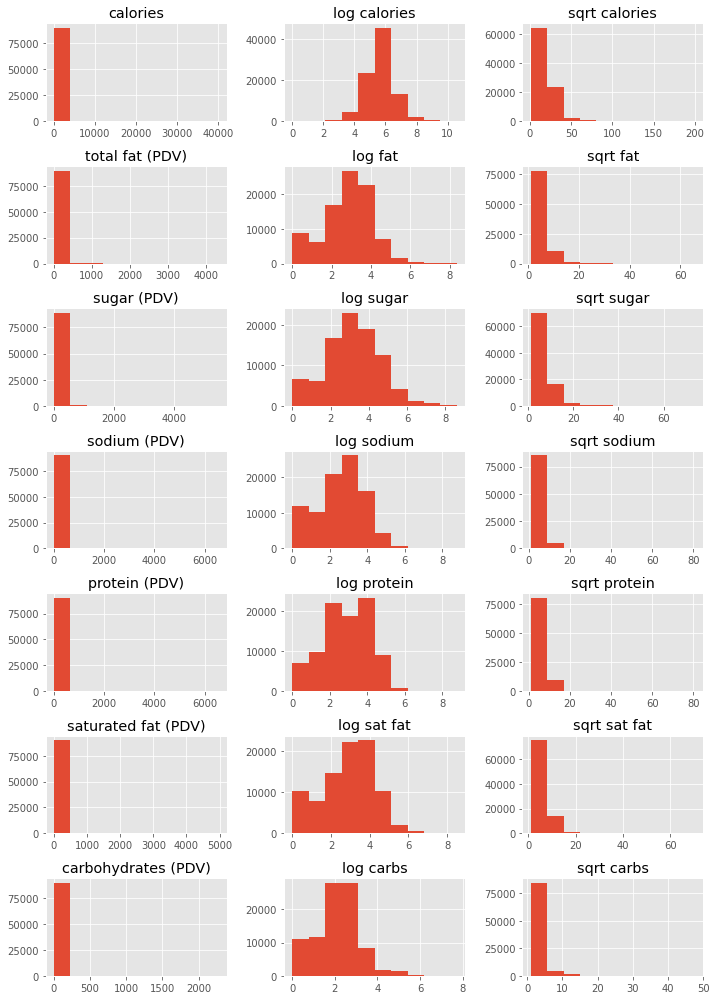

In [ ]:
df[['calories',
    'log calories',
    'sqrt calories',
    'total fat (PDV)', 
    'log fat',
    'sqrt fat',
    'sugar (PDV)',
    'log sugar',
    'sqrt sugar', 
    'sodium (PDV)', 
    'log sodium',
    'sqrt sodium',
    'protein (PDV)',
    'log protein',
    'sqrt protein',
    'saturated fat (PDV)',
    'log sat fat',
    'sqrt sat fat', 
    'carbohydrates (PDV)',
    'log carbs',
    'sqrt carbs'
    ]
   ].hist(figsize=(10,14), layout=(7,3))
plt.tight_layout()
plt.show()

We will use log transform for all nutritional values as they give better results than sqrt.

In [ ]:
df[lst].describe()

,calories,log calories,sqrt calories,total fat (PDV),log fat,sqrt fat,sugar (PDV),log sugar,sqrt sugar,sodium (PDV),log sodium,sqrt sodium,protein (PDV),log protein,sqrt protein,saturated fat (PDV),log sat fat,sqrt sat fat,carbohydrates (PDV),log carbs,sqrt carbs
count,90333.000000,90333.000000,90333.000000,90333.000000,90333.000000,90333.000000,90333.000000,90333.000000,90333.000000,90333.000000,90333.000000,90333.000000,90333.000000,90333.000000,90333.000000,90333.000000,90333.000000,90333.000000,90333.000000,90333.000000,90333.000000
mean,426.603888,5.626749,18.486881,32.496994,2.799401,4.849876,69.539393,3.168081,6.326050,26.699733,2.534597,4.318859,34.680615,2.859858,5.045148,40.092724,2.857366,5.222366,14.760143,2.127580,3.308549
std,635.987831,0.923043,9.210867,59.022159,1.254283,2.995963,192.812386,1.440468,5.433305,63.971624,1.293171,2.836773,56.586973,1.280253,3.037631,76.533355,1.404000,3.580469,26.992176,1.017143,1.952867
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,166.700000,5.116196,12.911235,9.000000,2.197225,3.000000,10.000000,2.302585,3.162278,6.000000,1.791759,2.449490,7.000000,1.945910,2.645751,7.000000,1.945910,2.645751,4.000000,1.386294,2.000000
50%,291.400000,5.674697,17.070442,19.000000,2.944439,4.358899,24.000000,3.178054,4.898979,15.000000,2.708050,3.872983,18.000000,2.890372,4.242641,21.000000,3.044522,4.582576,9.000000,2.197225,3.000000
75%,477.500000,6.168564,21.851773,38.000000,3.637586,6.164414,62.000000,4.127134,7.874008,32.000000,3.465736,5.656854,52.000000,3.951244,7.211103,47.000000,3.850148,6.855655,16.000000,2.772589,4.000000
max,40160.200000,10.600632,200.400100,4332.000000,8.373785,65.817931,5488.000000,8.610319,74.081037,6556.000000,8.788136,80.969130,6553.000000,8.787678,80.950602,4970.000000,8.511175,70.498227,2276.000000,7.730175,47.707442


### 2. Distribution of ratings

In [ ]:
df.columns

Index(['recipe_id', 'category', 'name', 'n_ingredients', 'minutes', 'calories',
       'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)',
       'saturated fat (PDV)', 'carbohydrates (PDV)', 'user_id', 'date',
       'review', 'rating', 'log calories', 'sqrt calories', 'log fat',
       'sqrt fat', 'log sugar', 'sqrt sugar', 'log sodium', 'sqrt sodium',
       'log protein', 'sqrt protein', 'log sat fat', 'sqrt sat fat',
       'log carbs', 'sqrt carbs'],
      dtype='object')

In [ ]:
df.rating.value_counts()

5    67035
4    18669
3     2897
0     1185
2      455
1       92
Name: rating, dtype: int64

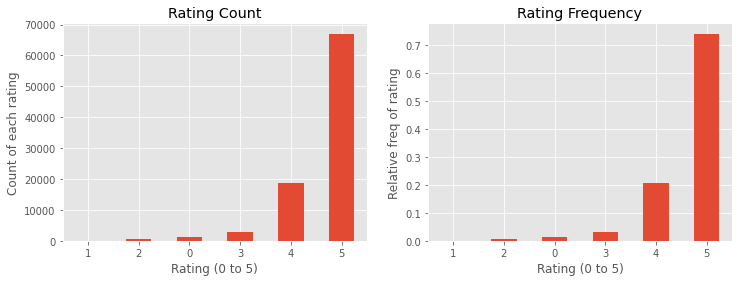

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df['rating'].value_counts(ascending=True).plot(kind="bar", 
                                               title="Rating Count", 
                                               rot=0, 
                                               xlabel="Rating (0 to 5)", 
                                               ylabel="Count of each rating",
                                               ax=axes[0],
                                               figsize=(12,4)
                                               )

df['rating'].value_counts(ascending=True,normalize=True).plot(kind="bar", 
                                                              title="Rating Frequency", 
                                                              rot=0, 
                                                              xlabel="Rating (0 to 5)", 
                                                              ylabel="Relative freq of rating",
                                                              ax=axes[1],
                                                              figsize=(12,4)
                                                              )

### 3. Number of ratings each recipe has vs avg rating of recipe

In [5]:
df_recipe = df.groupby('recipe_id')

In [6]:
df_recipe_rating = pd.concat([df_recipe['rating'].mean(), df_recipe['rating'].sum()], axis=1)
df_recipe_rating.columns = ['avg_rating','total_rating']
print(df_recipe_rating)

           avg_rating  total_rating
recipe_id                          
40                5.0             5
46                5.0             5
58                5.0             5
62                5.0             5
70                0.0             0
...               ...           ...
536119            4.0             4
536212            5.0             5
536363            5.0             5
536383            5.0             5
536411            5.0             5

[59228 rows x 2 columns]


In [8]:
df_recipe_rating_count = pd.DataFrame(df_recipe_rating.value_counts())

In [9]:
df_recipe_rating_count.reset_index(inplace=True)

In [10]:
df_recipe_rating_count.rename(columns={0:"recipe_count"}, inplace=True)
df_recipe_rating_count

,avg_rating,total_rating,recipe_count
0,5.000000,5,29842
1,4.000000,4,9954
2,5.000000,10,6164
3,4.500000,9,2655
4,5.000000,15,1711
...,...,...,...
164,3.750000,30,1
165,4.722222,85,1
166,4.375000,35,1
167,4.733333,71,1


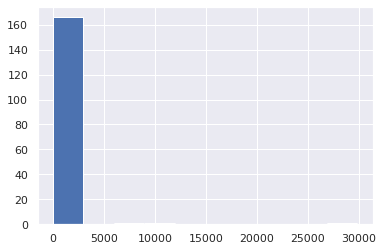

In [18]:
df_recipe_rating_count.recipe_count.hist()

In [160]:
df_recipe_rating_count['recipe_count_log'] = np.log(df_recipe_rating_count.recipe_count)
df_recipe_rating_count.head(3)

,avg_rating,total_rating,recipe_count,recipe_count_log
0,5.0,5,29842,10.303672
1,4.0,4,9954,9.205730
2,5.0,10,6164,8.726481


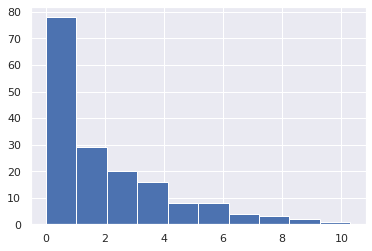

In [21]:
df_recipe_rating_count.recipe_count_log.hist()

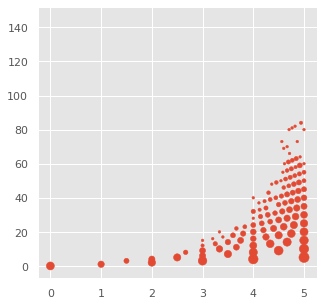

In [159]:
# y = total reviews of each recipe
# x = avg review for each recipe
# size of point = number of recipes

plt.figure(figsize=(5,5))
plt.scatter(df_recipe_rating_count.avg_rating, df_recipe_rating_count.total_rating, s=df_recipe_rating_count.recipe_count_log*10)



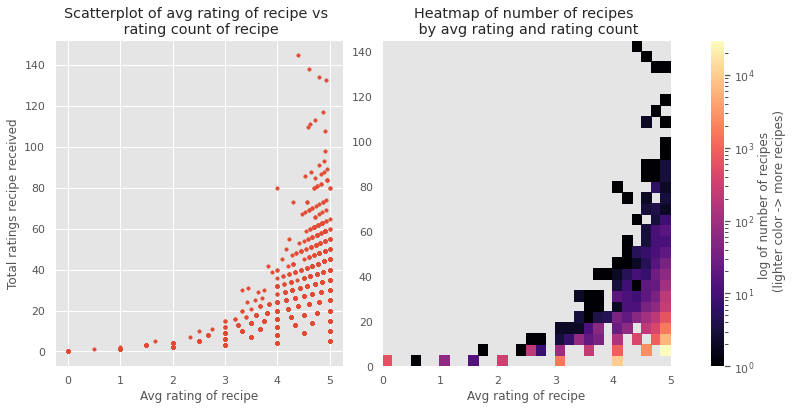

In [166]:
fig, (ax1,ax2,cax) = plt.subplots(nrows=1, ncols=3, figsize=(12,6), gridspec_kw={"width_ratios":[1,1, 0.05]})

x = df_recipe_rating.avg_rating
y = df_recipe_rating.total_rating

ax1.scatter(x, y, s=12)
ax1.set_title('Scatterplot of avg rating of recipe vs \n rating count of recipe')
ax1.set_xlabel('Avg rating of recipe')
ax1.set_ylabel('Total ratings recipe received')

counts, xedges, yedges, im = ax2.hist2d(x, y, (30,30), norm=LogNorm(), cmap = plt.cm.magma)
ax2.set_title('Heatmap of number of recipes \n by avg rating and rating count')
ax2.set_xlabel('Avg rating of recipe')
# ax2.set_ylabel('Total ratings recipe received')
cbar = fig.colorbar(im,cax=cax)
cbar.set_label('log of number of recipes \n (lighter color -> more recipes)')
plt.show()

### 4. Number of reviews user has done vs avg rating by user

In [168]:
df_user = df.groupby('user_id')

In [169]:
df.user_id.value_counts()

56003     999
61660     993
145352    983
537937    966
171790    962
         ... 
65056     510
20480     508
27678     506
24386     505
840768    500
Name: user_id, Length: 129, dtype: int64

In [170]:
df_user_rating = pd.concat([df_user['rating'].mean(), df_user['rating'].sum()], axis=1)
df_user_rating.columns = ['avg_rating','total_rating']
print(df_user_rating)

         avg_rating  total_rating
user_id                          
1535       4.453353          3055
4439       4.692857          2628
6258       4.686998          2920
8629       4.270922          3011
13483      4.571578          4375
...             ...           ...
860079     4.877358          2585
865936     4.404284          3290
869184     4.708171          2420
895132     4.869863          4266
1680722    4.988782          3113

[129 rows x 2 columns]


In [171]:
df_user_rating.value_counts()

avg_rating  total_rating
4.988782    3113            1
4.706983    3775            1
4.532508    2928            1
4.533186    4098            1
4.545695    3432            1
                           ..
4.793893    2512            1
4.800250    3845            1
4.801802    2665            1
4.802277    4639            1
3.228070    2208            1
Length: 129, dtype: int64

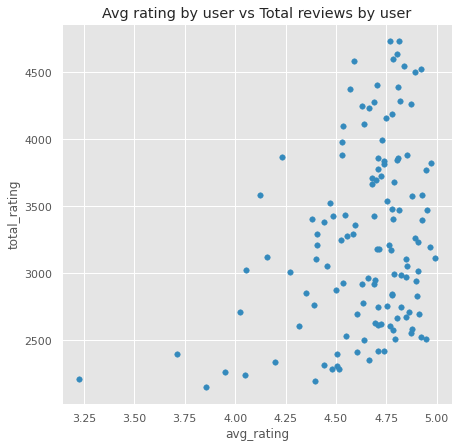

In [175]:
# y = total reviews of each user
# x = avg review of each user
#each plot in the graph is an individual user

df_user_rating.plot(kind='scatter',
                    title='Avg rating by user vs Total reviews by user',
                    x='avg_rating',
                    y='total_rating',
                    s=30,
                    figsize=(7,7)
                    )

### 5. Distribution of categories

In [176]:
df.category.value_counts()

vegetables    20959
meat          17725
desserts      15031
pasta         10646
breads         7570
beverages      6643
seafood        4300
soup           4170
salads         3051
burgers         238
Name: category, dtype: int64

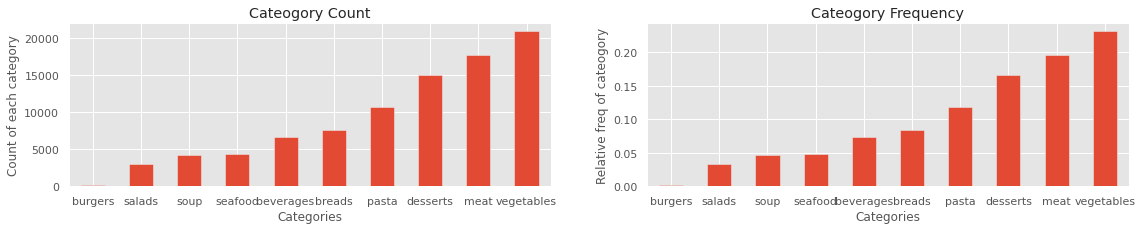

In [177]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df['category'].value_counts(ascending=True).plot(kind="bar", 
                                               title="Cateogory Count", 
                                               rot=0, 
                                               xlabel="Categories", 
                                               ylabel="Count of each category",
                                               ax=axes[0],
                                               figsize=(19,3)
                                               )

df['category'].value_counts(ascending=True,normalize=True).plot(kind="bar", 
                                                              title="Cateogory Frequency", 
                                                              rot=0, 
                                                              xlabel="Categories", 
                                                              ylabel="Relative freq of cateogory",
                                                              ax=axes[1],
                                                              figsize=(19,3)
                                                              )

### 6. Wordcloud

Clean up text columns first, then do wordcloud for:

1. Reviews
   
   a. For all reviews

   b. Breakdown rating 0 to 5

In [ ]:
# grab only the ratings and their review from the original df
df_review = df[['rating','review']]

#set the ratings to be the index, and drop the 'rating' column name
df_review = df_review.set_index('rating')
df_review.index.name = None
df_review

,review
4,I brought this to an office holiday party and ...
4,Good recipe and easy to make. I found it a li...
2,This is a nice casserole. It is very easy to ...
3,Very easy to make for a lunch. I served it co...
5,I like easy and good. I bought the pie shell ...
...,...
5,I had to make small adjustments according to w...
5,This was incredibly simple and easy to put tog...
4,I doubled the garlic and felt that it could us...
5,These cookies were wonderful. I've had this in...


#### Cleaning up text

##### Removing stopwords & punc, making lowercase

In [ ]:
import re 
import string

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

import collections

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
stop = stopwords.words('english')
def clean_text(text):
    # Lowercase, Remove Non-alphanumeric characters, Punctuations, Numbers & Stopwords
    text = text.lower()
    text = re.sub('[^A-Za-z\s]+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text) 

    text = ' '.join([word for word in text.split() if word not in (stop)])

    return text

In [ ]:
# apply cleaning function onto review column
df_review = pd.DataFrame(df_review['review'].apply(clean_text))
df_review.head()

,review
4,brought office holiday party everyone enjoyed
4,good recipe easy make found little bit thick s...
2,nice casserole easy put together
3,easy make lunch served cold sandwich found lit...
5,like easy good bought pie shell used cool whip...


In [ ]:
#pickle corpus
df_review.to_pickle('/content/drive/MyDrive/IntroML/data/review_corpus.pkl')

##### Getting most common words by rating number

In [ ]:
#If using pickle
df_review = pd.read_pickle('/content/drive/MyDrive/IntroML/data/review_corpus.pkl')
df_review

,review
4,brought office holiday party everyone enjoyed
4,good recipe easy make found little bit thick s...
2,nice casserole easy put together
3,easy make lunch served cold sandwich found lit...
5,like easy good bought pie shell used cool whip...
...,...
5,make small adjustments according hand used rol...
5,incredibly simple easy put together thank much
4,doubled garlic felt could use big garlic fans ...
5,cookies wonderful ive saves long time waiting ...


In [ ]:
#since my computer and colab cannot handle cv to create a counter, we will just use a rudimentary counter
top_words = {}

for i in range(6): #for rating 0 to 5
  wc = {}
  for line in df_review['review'][i].str.split(): 
      for word in line:
        if word not in wc:
          wc[word]=1
        else:
          wc[word]+=1
  top_words[i] = wc

In [ ]:
top_dict = []

#run a loop through the top_words to get the most common words
for rating, wordcount in top_words.items():
  word_counter = collections.Counter(wordcount)
  print(rating, "----------------------")
  for word, count in word_counter.most_common(10):
    #prints out the top 10 words in each rating from 0-5
    print(word, ": ", count)
    #add each word to top_dict
    top_dict.append(word)

print(top_dict)

0 ----------------------
recipe :  932
made :  636
used :  552
make :  425
didnt :  391
would :  378
like :  318
try :  308
thanks :  300
think :  289
1 ----------------------
recipe :  68
sorry :  44
didnt :  38
like :  33
made :  31
one :  30
really :  26
make :  26
work :  26
would :  24
2 ----------------------
recipe :  319
didnt :  244
would :  210
like :  180
made :  179
sorry :  168
really :  154
taste :  124
used :  123
flavor :  120
3 ----------------------
recipe :  1737
would :  1416
made :  1324
used :  1026
didnt :  967
good :  956
make :  918
like :  891
flavor :  776
time :  737
4 ----------------------
recipe :  10327
made :  9942
used :  8813
thanks :  7306
good :  7159
time :  5772
would :  5404
make :  5343
really :  4402
easy :  4263
5 ----------------------
recipe :  42558
made :  40631
used :  32904
thanks :  29574
great :  20374
make :  19570
easy :  14685
good :  14641
really :  13814
delicious :  13033
['recipe', 'made', 'used', 'make', 'didnt', 'would', 'like

In [ ]:
#aggregrate the top_dict list and identify most common words along with how many categories they occur in
#count of words = number of categories they occur in (max you can appear is 6, meaning you appear in rating 0-5)

collections.Counter(top_dict).most_common()

[('recipe', 6),
 ('made', 6),
 ('used', 5),
 ('make', 5),
 ('would', 5),
 ('didnt', 4),
 ('like', 4),
 ('really', 4),
 ('thanks', 3),
 ('good', 3),
 ('sorry', 2),
 ('flavor', 2),
 ('time', 2),
 ('easy', 2),
 ('try', 1),
 ('think', 1),
 ('one', 1),
 ('work', 1),
 ('taste', 1),
 ('great', 1),
 ('delicious', 1)]

##### adding these words to stop_words

In [ ]:
#if more than half of the ratings (i.e. more than 2) have this word as a top word, add it to stop_words 
add_stop_words = [word for word, count in collections.Counter(top_dict).most_common() if count > 2]
add_stop_words


['recipe',
 'made',
 'used',
 'make',
 'would',
 'didnt',
 'like',
 'really',
 'thanks',
 'good']

In [ ]:
#add the stopwords into the function clean_text
stop.extend(add_stop_words)

In [ ]:
#re-run clean_text to remove the new words
df_review = pd.DataFrame(df_review['review'].apply(clean_text))
df_review.head()

,review
4,brought office holiday party everyone enjoyed
4,easy found little bit thick salad dressing add...
2,nice casserole easy put together
3,easy lunch served cold sandwich found little b...
5,easy bought pie shell cool whip came together ...


In [ ]:
#pickle corpus
df_review.to_pickle('/content/drive/MyDrive/IntroML/data/review_corpus.pkl')

#### a. Wordcloud of all reviews

In [ ]:
#initialise wordcloud
wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

Text(0.5, 1.0, 'Wordcloud of all reviews')

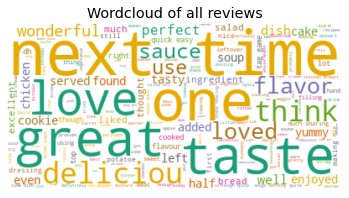

In [ ]:
all_review = " ".join(cell for cell in df_review.review)  
wc.generate(all_review) 
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud of all reviews')

#### b. Wordcloud of reviews, separated by their ratings

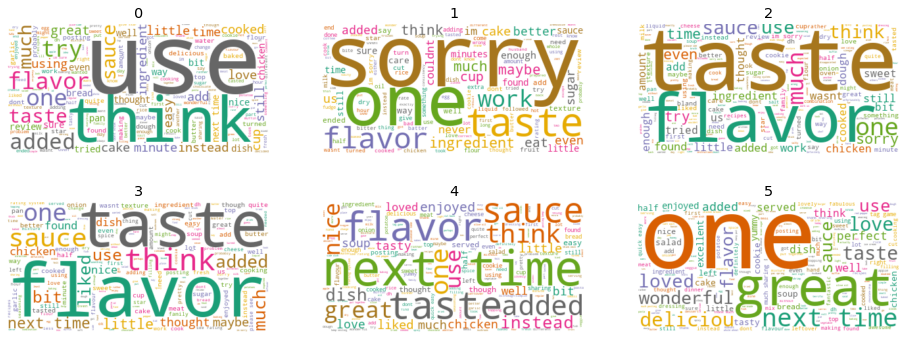

In [ ]:
plt.rcParams['figure.figsize'] = [16, 6]

# Create subplots for each category
for i in range(6): #i = 0, 1, 2, 3, 4, 5
    all_review = " ".join(cell for cell in df_review.review[i])  
    wc.generate(all_review) 
    
    plt.subplot(2, 3, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(i)
    
plt.show()


### n_ingredient distribution

In [183]:
df[['n_ingredients']].describe()

,n_ingredients
count,90333.000000
mean,8.825092
std,3.595840
min,1.000000
25%,6.000000
50%,8.000000
75%,11.000000
max,43.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83d4b66f10>]],
      dtype=object)

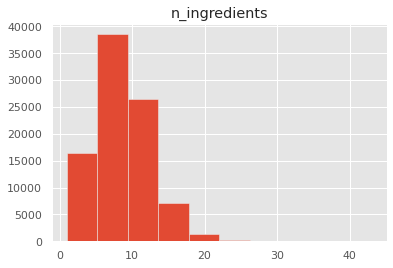

In [194]:
df[['n_ingredients']].hist()

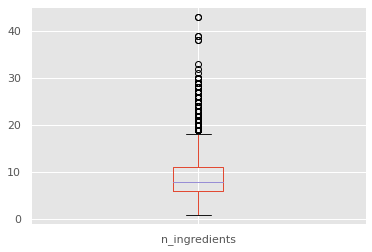

In [196]:
df[['n_ingredients']].boxplot()

### minutes distribution

In [191]:
df[['minutes']].describe()

,minutes
count,9.033300e+04
mean,9.518383e+04
std,1.428991e+07
min,0.000000e+00
25%,2.000000e+01
50%,3.500000e+01
75%,6.500000e+01
max,2.147484e+09


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83d4005a50>]],
      dtype=object)

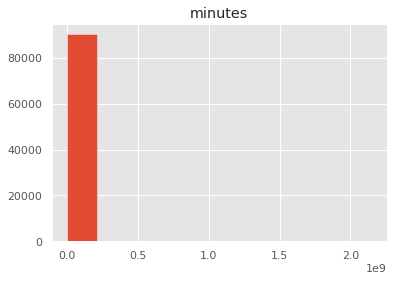

In [199]:
df[['minutes']].hist()

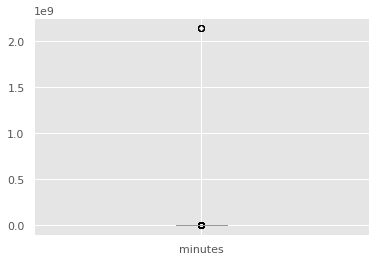

In [198]:
df[['minutes']].boxplot()

In [202]:
df_mindrop = df[df.minutes != df.minutes.max()]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83d3fb58d0>]],
      dtype=object)

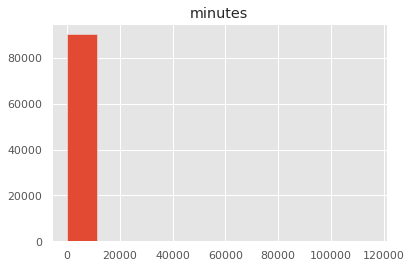

In [204]:
df_mindrop[['minutes']].hist()

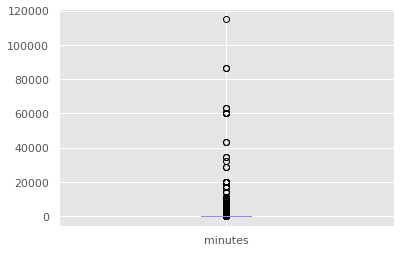

In [203]:
df_mindrop[['minutes']].boxplot()

## Saving to csv

After taking `log`*italicised text* on nutritional information

In [ ]:
df.columns

Index(['recipe_id', 'category', 'name', 'n_ingredients', 'minutes', 'calories',
       'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)',
       'saturated fat (PDV)', 'carbohydrates (PDV)', 'user_id', 'date',
       'review', 'rating', 'log calories', 'sqrt calories', 'log fat',
       'sqrt fat', 'log sugar', 'sqrt sugar', 'log sodium', 'sqrt sodium',
       'log protein', 'sqrt protein', 'log sat fat', 'sqrt sat fat',
       'log carbs', 'sqrt carbs'],
      dtype='object')

In [ ]:
df[columns_to_keep].describe()

,recipe_id,n_ingredients,minutes,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV),user_id,rating,log calories,log fat,log sugar,log sodium,log protein,log sat fat,log carbs
count,90333.000000,90333.000000,9.033300e+04,90333.000000,90333.000000,90333.000000,90333.000000,90333.000000,90333.000000,90333.000000,9.033300e+04,90333.000000,90333.000000,90333.000000,90333.000000,90333.000000,90333.000000,90333.000000,90333.000000
mean,191159.894789,8.825092,9.518383e+04,425.603976,31.572936,68.586652,25.790741,33.725029,39.177499,13.819922,2.479193e+05,4.644416,5.619661,2.716857,3.087543,2.423818,2.757206,2.769319,1.964663
std,131518.188287,3.595840,1.428991e+07,635.987772,58.982214,192.795703,63.935699,56.560906,76.490547,26.962727,2.586859e+05,0.773367,0.937593,1.313729,1.516306,1.373102,1.374466,1.475324,1.122431
min,40.000000,1.000000,0.000000e+00,0.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.535000e+03,0.000000,-2.302585,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,79023.000000,6.000000,2.000000e+01,165.700000,8.000000,9.000000,5.000000,6.000000,6.000000,3.000000,5.611200e+04,4.000000,5.110179,2.079442,2.197225,1.609438,1.791759,1.791759,1.098612
50%,169940.000000,8.000000,3.500000e+01,290.400000,18.000000,23.000000,14.000000,17.000000,20.000000,8.000000,1.717900e+05,5.000000,5.671259,2.890372,3.135494,2.639057,2.833213,2.995732,2.079442
75%,285302.000000,11.000000,6.500000e+01,476.500000,37.000000,61.000000,31.000000,51.000000,46.000000,15.000000,3.360580e+05,5.000000,6.166468,3.610918,4.110874,3.433987,3.931826,3.828641,2.708050
max,536411.000000,43.000000,2.147484e+09,40159.200000,4331.000000,5487.000000,6555.000000,6552.000000,4969.000000,2275.000000,1.680722e+06,5.000000,10.600607,8.373554,8.610137,8.787983,8.787526,8.510974,7.729735


In [ ]:
columns_to_keep = ['recipe_id', 'category', 'name', 'n_ingredients', 'minutes', 'calories',
       'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)', 'saturated fat (PDV)', 'carbohydrates (PDV)',
       'user_id', 'date', 'review', 'rating', 
       'log calories', 'log fat', 'log sugar', 'log sodium', 'log protein', 'log sat fat','log carbs']

df.to_csv('/content/drive/MyDrive/IntroML/data/final_dataset_log.csv', columns = columns_to_keep)